In [1]:
'hello'

'hello'

In [2]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Combine YAML files from multiple folders into a single CSV
import os
import yaml
import pandas as pd

root_folder = "C:\\Users\\Amirtha\\OneDrive\\Desktop\\Project\\Data-Driven Stock Analysis\\Data\\YAML_FILES"

all_data = []

# Loop through each month folder
for month_folder in os.listdir(root_folder):

    full_month_path = os.path.join(root_folder, month_folder)

    # Ensure it's a folder
    if os.path.isdir(full_month_path):

        # Loop through YAML files inside the month folder
        for file in os.listdir(full_month_path):
            if file.endswith(".yaml") or file.endswith(".yml"):
                
                file_path = os.path.join(full_month_path, file)

                with open(file_path, "r") as f:
                    data = yaml.safe_load(f)

                df = pd.DataFrame(data)

                # Add month & file as metadata (optional)
                df["month"] = month_folder
                df["source_file"] = file

                all_data.append(df)

# Combine everything
final_df = pd.concat(all_data, ignore_index=True)

# Save to CSV
output_path = "C:\\Users\\Amirtha\\OneDrive\\Desktop\\Project\\Data-Driven Stock Analysis\\Data\\CLEANED DATA\\all_stock_data.csv"
final_df.to_csv(output_path, index=False)


print(final_df.head())


       Ticker    close                 date    high      low    month    open  \
0        SBIN   602.95  2023-10-03 05:30:00   604.9   589.60  2023-10   596.6   
1  BAJFINANCE  7967.60  2023-10-03 05:30:00  7975.5  7755.00  2023-10  7780.8   
2       TITAN  3196.25  2023-10-03 05:30:00  3212.5  3114.40  2023-10  3148.8   
3         ITC   439.75  2023-10-03 05:30:00   442.9   439.25  2023-10   441.0   
4         TCS  3513.85  2023-10-03 05:30:00  3534.2  3480.10  2023-10  3534.2   

     volume               source_file  
0  15322196  2023-10-03_05-30-00.yaml  
1    944555  2023-10-03_05-30-00.yaml  
2   1007308  2023-10-03_05-30-00.yaml  
3   7481883  2023-10-03_05-30-00.yaml  
4   1948148  2023-10-03_05-30-00.yaml  


In [4]:
# Display the first few rows of the final DataFrame
final_df.head()

,Ticker,close,date,high,low,month,open,volume,source_file
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196,2023-10-03_05-30-00.yaml
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555,2023-10-03_05-30-00.yaml
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308,2023-10-03_05-30-00.yaml
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883,2023-10-03_05-30-00.yaml
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148,2023-10-03_05-30-00.yaml


In [5]:
# Drop the source_file column as it's no longer needed
final_df.drop("source_file", axis=1, inplace=True)

In [6]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148


In [7]:
final_df.shape

(14200, 8)

In [8]:
# TO get unique tickers
ticker_unique = final_df['Ticker'].unique()
ticker_unique

array(['SBIN', 'BAJFINANCE', 'TITAN', 'ITC', 'TCS', 'LT', 'TATACONSUM',
       'RELIANCE', 'HCLTECH', 'JSWSTEEL', 'ULTRACEMCO', 'POWERGRID',
       'INFY', 'TRENT', 'BHARTIARTL', 'TATAMOTORS', 'WIPRO', 'TECHM',
       'NTPC', 'HINDUNILVR', 'APOLLOHOSP', 'M&M', 'GRASIM', 'ICICIBANK',
       'ADANIENT', 'ADANIPORTS', 'BEL', 'BAJAJFINSV', 'EICHERMOT',
       'COALINDIA', 'MARUTI', 'INDUSINDBK', 'ASIANPAINT', 'TATASTEEL',
       'HDFCLIFE', 'DRREDDY', 'SUNPHARMA', 'KOTAKBANK', 'SHRIRAMFIN',
       'NESTLEIND', 'ONGC', 'CIPLA', 'BPCL', 'BRITANNIA', 'SBILIFE',
       'HINDALCO', 'HEROMOTOCO', 'AXISBANK', 'HDFCBANK', 'BAJAJ-AUTO'],
      dtype=object)

In [9]:
# TO get the number of unique tickers
ticker_unique = final_df['Ticker'].unique()
ticker_unique.shape

(50,)

In [10]:
# Save individual CSV files for each ticker
for i in ticker_unique:
    df = final_df[final_df['Ticker'] == i]
    df.to_csv(f"C:\\Users\\Amirtha\\OneDrive\\Desktop\\Project\\Data-Driven Stock Analysis\\Data\\YAML_TO_CSV\\{i}.csv", index=False)
    
    

========== Data Cleaning ==========

In [11]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148


In [12]:
final_df.describe()

,close,high,low,open,volume
count,14200.000000,14200.000000,14200.000000,14200.000000,1.420000e+04
mean,2449.415380,2476.495940,2422.374544,2450.982693,6.833475e+06
std,2573.791109,2601.744121,2545.346794,2575.276197,1.129303e+07
min,116.600000,118.550000,114.600000,114.600000,5.987000e+03
25%,821.850000,831.900000,814.500000,824.775000,9.636955e+05
50%,1508.175000,1523.875000,1493.315000,1510.000000,2.446882e+06
75%,3101.762500,3138.150000,3066.062500,3101.837500,8.592909e+06
max,13495.600000,13680.000000,13274.450000,13393.000000,2.680527e+08


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB


In [14]:
# need to change the date column to datetime
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  14200 non-null  object        
 1   close   14200 non-null  float64       
 2   date    14200 non-null  datetime64[ns]
 3   high    14200 non-null  float64       
 4   low     14200 non-null  float64       
 5   month   14200 non-null  object        
 6   open    14200 non-null  float64       
 7   volume  14200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 887.6+ KB


In [15]:
# Display the first few rows of the final DataFrame
final_df.head()

,Ticker,close,date,high,low,month,open,volume
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148


In [16]:
#Extracts the year from the date column
final_df['year'] = final_df['date'].dt.year
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196,2023
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555,2023
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308,2023
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883,2023
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148,2023


In [17]:
# Calculate daily returns
final_df['daily_return'] = (
    final_df.groupby('Ticker')['close']
      .pct_change()
)

# Calculate cumulative returns(All Years)

final_df['cumulative_return'] = (
    final_df.groupby(['Ticker', 'year'])['daily_return']
      .transform(lambda x: (1 + x).cumprod() - 1)
)

In [18]:
# Load sector data
sector_df = pd.read_csv('C:\\Users\\Amirtha\\OneDrive\\Desktop\\Project\\Data-Driven Stock Analysis\\Data\\YAML_TO_CSV\\Sector_data - Sheet1.csv')
sector_df.head()

,COMPANY,sector,Symbol
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK


In [19]:
# Clean the Symbol Column
sector_df['Ticker'] = sector_df['Symbol'].str.split(':').str[-1].str.strip()
sector_df.head()

,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK


In [20]:
sector_df['Ticker'].unique()

array(['ADANIGREEN', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'AIRTEL', 'BPCL',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SBILIFE', 'SHRIRAMFIN',
       'SUNPHARMA', 'TATACONSUMER', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'], dtype=object)

In [22]:
final_df.isnull().sum()

Ticker                  0
close                   0
date                    0
high                    0
low                     0
month                   0
open                    0
volume                  0
year                    0
daily_return           50
cumulative_return      50
sector               1136
dtype: int64

In [23]:
final_df.describe()

,close,date,high,low,open,volume,year,daily_return,cumulative_return
count,14200.000000,14200,14200.000000,14200.000000,14200.000000,1.420000e+04,14200.000000,14150.000000,14150.000000
mean,2449.415380,2024-04-27 20:17:19.436619520,2476.495940,2422.374544,2450.982693,6.833475e+06,2023.785211,0.001025,0.115875
min,116.600000,2023-10-03 05:30:00,118.550000,114.600000,114.600000,5.987000e+03,2023.000000,-0.226068,-0.386191
25%,821.850000,2024-01-14 11:30:00,831.900000,814.500000,824.775000,9.636955e+05,2024.000000,-0.007555,-0.008671
50%,1508.175000,2024-04-29 17:30:00,1523.875000,1493.315000,1510.000000,2.446882e+06,2024.000000,0.000637,0.068513
75%,3101.762500,2024-08-09 23:30:00,3138.150000,3066.062500,3101.837500,8.592909e+06,2024.000000,0.009211,0.198166
max,13495.600000,2024-11-22 05:30:00,13680.000000,13274.450000,13393.000000,2.680527e+08,2024.000000,0.188633,1.695609
std,2573.791109,NaN,2601.744121,2545.346794,2575.276197,1.129303e+07,0.410690,0.017004,0.196155


In [24]:
# Fill missing daily returns with 0
final_df['daily_return'].fillna(0, inplace=True)

C:\Users\Amirtha\AppData\Local\Temp\ipykernel_17684\1783012586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['daily_return'].fillna(0, inplace=True)


In [25]:
# Fill missing cumulative returns with 0
final_df['cumulative_return'].fillna(0, inplace=True)

C:\Users\Amirtha\AppData\Local\Temp\ipykernel_17684\1705985508.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['cumulative_return'].fillna(0, inplace=True)


In [26]:
# Check sector distribution
final_df['sector'].value_counts()

sector
BANKING            1704
AUTOMOBILES        1704
SOFTWARE           1420
FINANCE             852
ENERGY              852
PHARMACEUTICALS     852
FOOD & TOBACCO      568
RETAILING           568
POWER               568
INSURANCE           568
MISCELLANEOUS       568
STEEL               568
FMCG                284
CEMENT              284
ENGINEERING         284
TEXTILES            284
MINING              284
DEFENCE             284
PAINTS              284
ALUMINIUM           284
Name: count, dtype: int64

In [27]:
sector_df['Ticker'].unique()

array(['ADANIGREEN', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'AIRTEL', 'BPCL',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH',
       'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SBILIFE', 'SHRIRAMFIN',
       'SUNPHARMA', 'TATACONSUMER', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'], dtype=object)

In [28]:
final_df.isnull().sum()

Ticker                  0
close                   0
date                    0
high                    0
low                     0
month                   0
open                    0
volume                  0
year                    0
daily_return            0
cumulative_return       0
sector               1136
dtype: int64

In [29]:
final_df[final_df['sector'].isnull()]

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
6,TATACONSUM,861.20,2023-10-03 05:30:00,868.75,853.49,2023-10,859.32,1168848,2023,0.000000,0.000000,NaN
14,BHARTIARTL,925.30,2023-10-03 05:30:00,928.25,916.05,2023-10,918.25,4338272,2023,0.000000,0.000000,NaN
24,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023,0.000000,0.000000,NaN
43,BRITANNIA,4495.45,2023-10-03 05:30:00,4553.25,4486.60,2023-10,4524.80,543482,2023,0.000000,0.000000,NaN
56,TATACONSUM,854.13,2023-10-04 05:30:00,859.17,844.50,2023-10,856.36,615431,2023,-0.008209,-0.008209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14143,BRITANNIA,4803.35,2024-11-21 05:30:00,4885.00,4746.90,2024-11,4875.00,1036549,2024,-0.018262,-0.100235,NaN
14156,TATACONSUM,945.20,2024-11-22 05:30:00,948.50,912.85,2024-11,916.25,1427895,2024,0.036745,-0.119483,NaN
14164,BHARTIARTL,1569.30,2024-11-22 05:30:00,1575.00,1520.20,2024-11,1533.00,7640321,2024,0.028948,0.520345,NaN
14174,ADANIENT,2228.00,2024-11-22 05:30:00,2289.70,2025.00,2024-11,2101.00,20939196,2024,0.020310,-0.217957,NaN


In [30]:
final_df[final_df['sector'].isnull()]['Ticker'].unique()

array(['TATACONSUM', 'BHARTIARTL', 'ADANIENT', 'BRITANNIA'], dtype=object)

In [31]:
# Manually fill missing sectors based on known tickers
final_df.loc[final_df['Ticker'] == 'TATACONSUM', 'sector'] = 'FMCG'
final_df.loc[final_df['Ticker'] == 'BHARTIARTL', 'sector'] = 'TELECOM'
final_df.loc[final_df['Ticker'] == 'ADANIENT', 'sector'] = 'MISCELLANEOUS'
final_df.loc[final_df['Ticker'] == 'BRITANNIA', 'sector'] = 'FMCG'

In [32]:
final_df.isnull().sum()

Ticker               0
close                0
date                 0
high                 0
low                  0
month                0
open                 0
volume               0
year                 0
daily_return         0
cumulative_return    0
sector               0
dtype: int64

In [33]:
final_df.duplicated().sum()

np.int64(0)

In [34]:
final_df.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
0,SBIN,602.95,2023-10-03 05:30:00,604.9,589.60,2023-10,596.6,15322196,2023,0.0,0.0,BANKING
1,BAJFINANCE,7967.60,2023-10-03 05:30:00,7975.5,7755.00,2023-10,7780.8,944555,2023,0.0,0.0,FINANCE
2,TITAN,3196.25,2023-10-03 05:30:00,3212.5,3114.40,2023-10,3148.8,1007308,2023,0.0,0.0,RETAILING
3,ITC,439.75,2023-10-03 05:30:00,442.9,439.25,2023-10,441.0,7481883,2023,0.0,0.0,FOOD & TOBACCO
4,TCS,3513.85,2023-10-03 05:30:00,3534.2,3480.10,2023-10,3534.2,1948148,2023,0.0,0.0,SOFTWARE


In [35]:
final_df.columns

Index(['Ticker', 'close', 'date', 'high', 'low', 'month', 'open', 'volume',
       'year', 'daily_return', 'cumulative_return', 'sector'],
      dtype='object')

In [36]:
final_df['year'].unique()   

array([2023, 2024], dtype=int32)

In [37]:
final_df = final_df.sort_values(['Ticker', 'date'])
final_df

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
24,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,2023,0.000000,0.000000,MISCELLANEOUS
74,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,2023,0.032548,0.032548,MISCELLANEOUS
124,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,2023,0.000568,0.033134,MISCELLANEOUS
174,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,2023,0.004764,0.038056,MISCELLANEOUS
224,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,2023,-0.014325,0.023186,MISCELLANEOUS
...,...,...,...,...,...,...,...,...,...,...,...,...
13966,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,2024,-0.004042,0.202419,SOFTWARE
14016,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,2024,-0.024440,0.173032,SOFTWARE
14066,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,2024,0.016551,0.192446,SOFTWARE
14116,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,2024,-0.008630,0.182156,SOFTWARE


In [38]:
# Define the 2024 dataset
df_2024 = final_df[final_df['year'] == 2024]
df_2024.head()

,Ticker,close,date,high,low,month,open,volume,year,daily_return,cumulative_return,sector
3074,ADANIENT,2917.2,2024-01-01 05:30:00,2947.00,2842.05,2024-01,2852.30,2898619,2024,0.023956,0.023956,MISCELLANEOUS
3124,ADANIENT,2932.4,2024-01-02 05:30:00,2948.20,2841.00,2024-01,2922.00,2671368,2024,0.005210,0.029291,MISCELLANEOUS
3174,ADANIENT,3003.0,2024-01-03 05:30:00,3199.00,2955.60,2024-01,3047.00,19725411,2024,0.024076,0.054073,MISCELLANEOUS
3224,ADANIENT,2998.3,2024-01-04 05:30:00,3044.45,2990.00,2024-01,3039.40,2975620,2024,-0.001565,0.052423,MISCELLANEOUS
3274,ADANIENT,3006.6,2024-01-05 05:30:00,3066.90,2981.10,2024-01,3009.95,3219949,2024,0.002768,0.055336,MISCELLANEOUS


In [39]:
# Cleaned_nifty_50.csv
final_df.to_csv(r'C:\Users\Amirtha\OneDrive\Desktop\Project\Data-Driven Stock Analysis\Data\CLEANED DATA\Cleaned_nifty_50.csv', index=False)

================= Data Analysis and Visualization =================

        Ticker  volatility
0     ADANIENT    0.027894
1   ADANIPORTS    0.025839
8          BEL    0.024814
47       TRENT    0.024524
34        ONGC    0.024115
10        BPCL    0.023276
39  SHRIRAMFIN    0.022073
13   COALINDIA    0.022069
21    HINDALCO    0.020871
24  INDUSINDBK    0.020504


C:\Users\Amirtha\AppData\Local\Temp\ipykernel_17684\600825621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['daily_returns'] = (
C:\Users\Amirtha\AppData\Local\Temp\ipykernel_17684\600825621.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['Ticker'], y=top_10['volatility'], palette='RdYlGn', legend=False)


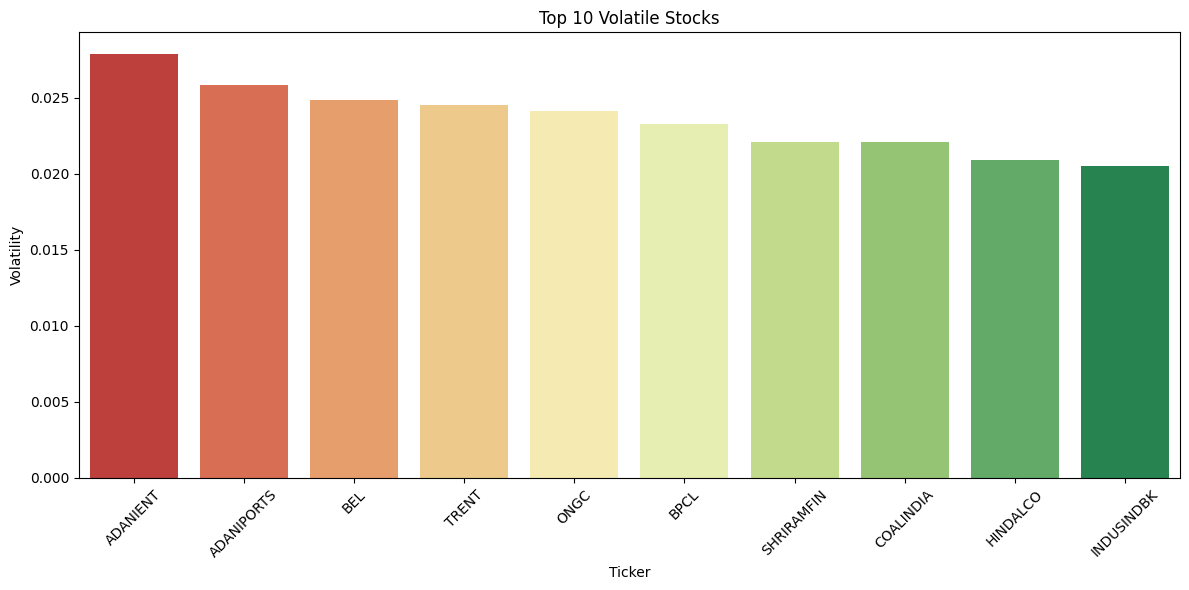

In [40]:
#1. Volatility Analysis

# Calaculate the daily returns
df_2024['daily_returns'] = (
    df_2024.groupby('Ticker')['close'].pct_change()
)

# Calaculate the volatility (standard deviation)
volatility_df = (
    df_2024.groupby('Ticker')['daily_returns'].std().reset_index().rename(columns={'daily_returns': 'volatility'})
)

# Select top 10 most volatile stocks
top_10 = volatility_df.sort_values('volatility', ascending=False).head(10)
print(top_10)

# Visualization - Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10['Ticker'], y=top_10['volatility'], palette='RdYlGn', legend=False)
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.title('Top 10 Volatile Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

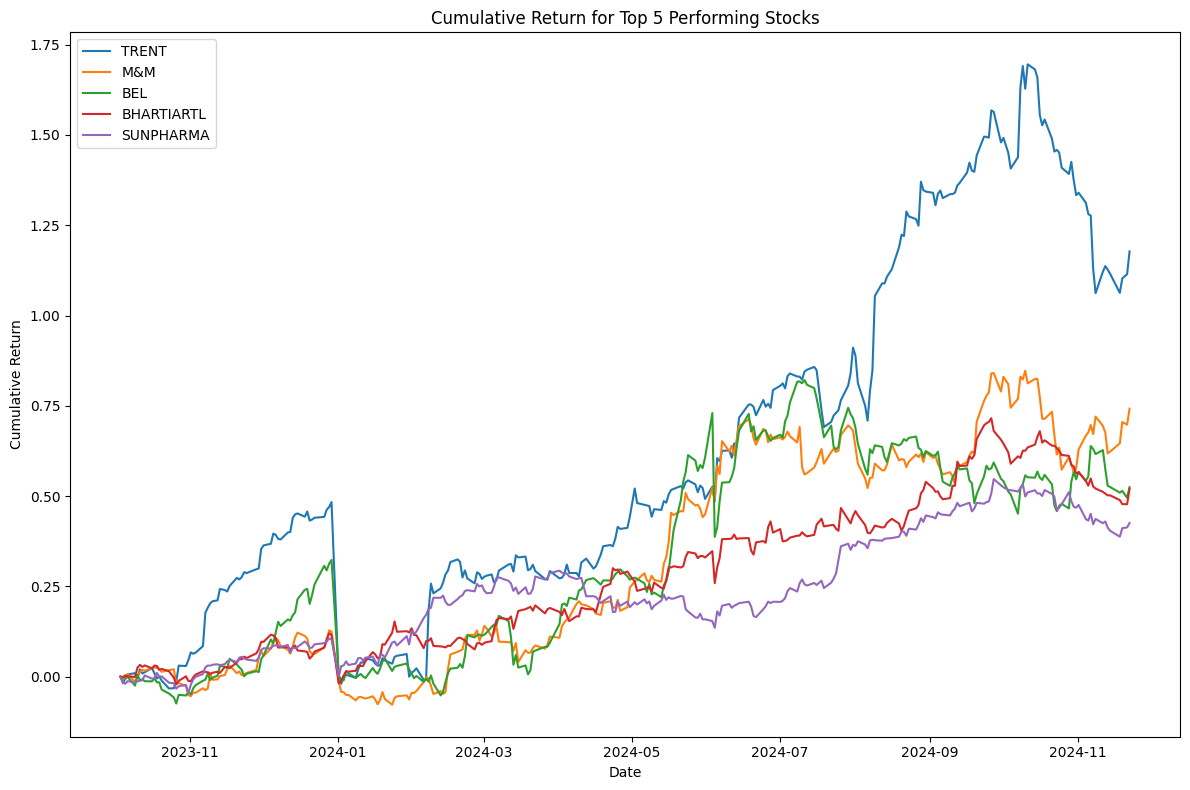

In [41]:
# 2. Cumulative Return Over Time

# Get the top 5 stocks based on the last cumulative return value
top_5 = final_df.groupby('Ticker')['cumulative_return'].last().nlargest(5).index

# Set the plot size
plt.figure(figsize=(12, 8))
for ticker in top_5:
    stock_data = final_df[final_df['Ticker'] == ticker]
    sns.lineplot(data=stock_data, x='date', y='cumulative_return', label=ticker)

plt.title('Cumulative Return for Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
# plt.savefig('top_5_cumulative_return.png')
plt.show()

In [42]:
#3. Sector-wise Performance

sector_df.head(10)

,COMPANY,sector,Symbol,Ticker
0,ADANI ENTERPRISES,MISCELLANEOUS,ADANI ENTERPRISES: ADANIGREEN,ADANIGREEN
1,ADANI PORTS & SEZ,MISCELLANEOUS,ADANI PORTS & SEZ: ADANIPORTS,ADANIPORTS
2,APOLLO HOSPITALS,MISCELLANEOUS,APOLLO HOSPITALS: APOLLOHOSP,APOLLOHOSP
3,ASIAN PAINTS,PAINTS,ASIAN PAINTS: ASIANPAINT,ASIANPAINT
4,AXIS BANK,BANKING,AXIS BANK: AXISBANK,AXISBANK
5,BAJAJ AUTO,AUTOMOBILES,BAJAJ AUTO: BAJAJ-AUTO,BAJAJ-AUTO
6,BAJAJ FINANCE,FINANCE,BAJAJ FINANCE: BAJFINANCE,BAJFINANCE
7,BAJAJ FINSERV,FINANCE,BAJAJ FINSERV: BAJAJFINSV,BAJAJFINSV
8,BHARAT ELECTRONICS,DEFENCE,BHARAT ELECTRONICS: BEL,BEL
9,BHARTI AIRTEL,TELECOM,BHARTI AIRTEL: AIRTEL,AIRTEL


In [43]:
# Calculate Yearly Return per Stock
yearly_return = (
    final_df.groupby(['Ticker', 'year'])
    .agg(
        first_close = ('close', 'first'),
        last_close = ('close', 'last'),
        sector = ('sector', 'first')
    )
    .reset_index()
)

yearly_return['yearly_return %'] = (
    (yearly_return['last_close'] - yearly_return['first_close']) / yearly_return['first_close']
) * 100

yearly_return.head()

,Ticker,year,first_close,last_close,sector,yearly_return %
0,ADANIENT,2023,2387.25,2848.95,MISCELLANEOUS,19.340245
1,ADANIENT,2024,2917.20,2228.00,MISCELLANEOUS,-23.625394
2,ADANIPORTS,2023,831.40,1024.35,MISCELLANEOUS,23.207842
3,ADANIPORTS,2024,1047.85,1136.75,MISCELLANEOUS,8.484039
4,APOLLOHOSP,2023,5118.95,5704.10,MISCELLANEOUS,11.431055


In [44]:
# Calculate Average Yearly Return by Sector
sector_performance_year = (
    yearly_return.groupby(['sector', 'year'])['yearly_return %']
    .mean()
    .reset_index()
)

sector_performance_year.head(11)

,sector,year,yearly_return %
0,ALUMINIUM,2023,28.107094
1,ALUMINIUM,2024,6.831586
2,AUTOMOBILES,2023,22.361669
3,AUTOMOBILES,2024,27.649229
4,BANKING,2023,8.929113
5,BANKING,2024,2.781081
6,CEMENT,2023,26.467507
7,CEMENT,2024,8.708907
8,DEFENCE,2023,32.327586
9,DEFENCE,2024,51.851852


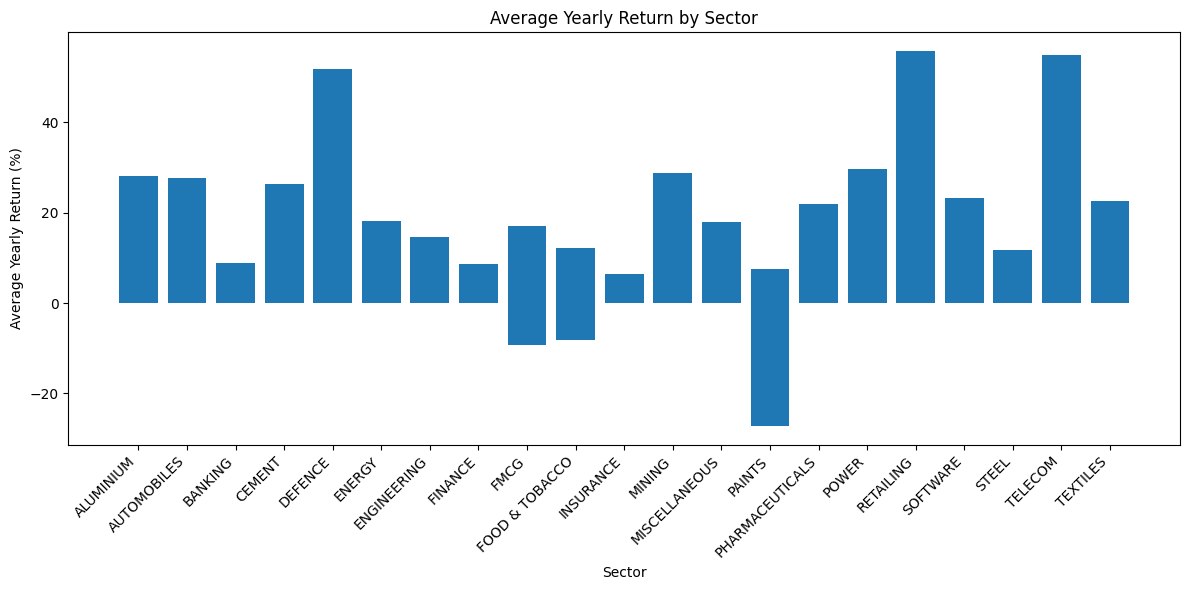

In [45]:
# Visualization – Sector-wise Bar Chart
plt.figure(figsize=(12,6))
plt.bar(sector_performance_year['sector'], sector_performance_year['yearly_return %'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return (%)')
plt.title('Average Yearly Return by Sector')
plt.tight_layout()
plt.show()

In [46]:
#4. Stock Price Correlation
returns_pivot = final_df.pivot_table(
    index = 'date',
    columns = 'Ticker',
    values = 'daily_return'
)
# Calculate Correlation Matrix
corr_matrix = returns_pivot.corr()

In [53]:
# Plot Correlation Heatmap

import plotly.express as px

fig = px.imshow(
    corr_matrix,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    labels = dict(x='Ticker', y='Ticker', color='Correlation'),
    title='Stock Price Correlation Heatmap'
)

fig.update_layout(
    width=800,
    height=800,
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

fig.show()

In [54]:
#5. Top 5 Gainers and Losers (Month-wise)


import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

monthly_return = (
    final_df
    .groupby(['Ticker', 'year', 'month'])['close']
    .agg(first_close='first', last_close='last')
    .reset_index()
)

monthly_return['monthly_return_%'] = (
    (monthly_return['last_close'] - monthly_return['first_close'])
    / monthly_return['first_close']
) * 100
monthly_return.head()

,Ticker,year,month,first_close,last_close,monthly_return_%
0,ADANIENT,2023,2023-10,2387.25,2294.65,-3.878940
1,ADANIENT,2023,2023-11,2217.30,2358.55,6.370360
2,ADANIENT,2023,2023-12,2362.70,2848.95,20.580268
3,ADANIENT,2024,2024-01,2917.20,3142.00,7.706019
4,ADANIENT,2024,2024-02,3153.50,3285.40,4.182654


In [55]:
months_list = (
    monthly_return[['year', 'month']]
    .drop_duplicates()
    .sort_values(['year', 'month'])
    .values.tolist()
)

n_plots = len(months_list)
cols = 3
rows = math.ceil(n_plots / cols)

fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[f"{mon} {yr}" for yr, mon in months_list]
)

row, col = 1, 1

for yr, mon in months_list:

    data = monthly_return[
        (monthly_return['year'] == yr) &
        (monthly_return['month'] == mon)
    ]

    # Top 5 Gainers
    top_gainers = data.sort_values(
        'monthly_return_%', ascending=False
    ).head(5)

    # Top 5 Losers
    top_losers = data.sort_values(
        'monthly_return_%'
    ).head(5)

    # GAINERS (Green)
    fig.add_trace(
        go.Bar(
            x=top_gainers['Ticker'],
            y=top_gainers['monthly_return_%'],
            text=top_gainers['monthly_return_%'].round(2),
            textposition='outside',
            marker_color='green',
            name='Gainers'
        ),
        row=row,
        col=col
    )

    # LOSERS (Red)
    fig.add_trace(
        go.Bar(
            x=top_losers['Ticker'],
            y=top_losers['monthly_return_%'],
            text=top_losers['monthly_return_%'].round(2),
            textposition='outside',
            marker_color='red',
            name='Losers'
        ),
        row=row,
        col=col
    )

    col += 1
    if col > cols:
        col = 1
        row += 1

fig.update_layout(
    title="Top 5 Gainers and Losers by Month (All Years)",
    height=350 * rows,
    showlegend=False,
    barmode='group'
)

# Zero reference line
fig.add_hline(y=0, line_dash="dash", line_color="black")

fig.show()


In [ ]:
import streamlit as st

# ---------------- PAGE CONFIG ----------------
st.set_page_config(
    page_title="Stock Market Analysis",
    page_icon="📊",
    layout="wide"
)

# ---------------- CSS ----------------
st.markdown("""
<style>
.main {
    background: radial-gradient(circle at top, #3b136f, #120018);
    color: white;
}

.hero-title {
    font-size: 52px;
    font-weight: 900;
    text-align: center;
    background: linear-gradient(90deg, #ff7ad9, #b983ff);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}

.hero-sub {
    text-align: center;
    font-size: 18px;
    color: #d6c9ff;
    margin-bottom: 40px;
}

.card {
    background: rgba(255, 255, 255, 0.08);
    backdrop-filter: blur(10px);
    border-radius: 18px;
    padding: 22px;
    border: 1px solid rgba(255,255,255,0.15);
    box-shadow: 0 0 25px rgba(180,120,255,0.15);
}

.card h4 {
    margin-bottom: 8px;
}

/* GET STARTED BUTTON */
.get-started-btn {
    background: linear-gradient(90deg, #7f3cff, #b983ff);
    color: white;
    padding: 14px 42px;
    font-size: 18px;
    font-weight: 600;
    border-radius: 30px;
    border: none;
    cursor: pointer;
    box-shadow: 0 10px 25px rgba(127,60,255,0.35);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
}

.get-started-btn:hover {
    transform: translateY(-2px);
    box-shadow: 0 14px 30px rgba(127,60,255,0.45);
}
</style>
""", unsafe_allow_html=True)

# ---------------- HERO ----------------
st.markdown(
    "<div class='hero-title'>Welcome to Our Stock Market Analysis Dashboard!</div>",
    unsafe_allow_html=True
)

st.markdown(
    "<div class='hero-sub'>Track and analyze the performance of top stocks with a clean and intuitive dashboard.</div>",
    unsafe_allow_html=True
)

# ---------------- MAIN GRID ----------------
left, center, right = st.columns([1, 1.4, 1])

# LEFT COLUMN
with left:
    st.markdown("""
    <div class="card">
        <h4>🟢 Green vs Red Stocks</h4>
        <p>See the percentage of stocks that are moving up versus down.</p>
    </div>
    """, unsafe_allow_html=True)

    st.markdown("<br>", unsafe_allow_html=True)

    st.markdown("""
    <div class="card">
        <h4>🚀 Top Gainers & Losers</h4>
        <p>Identify stocks with the highest gains and biggest losses today.</p>
    </div>
    """, unsafe_allow_html=True)

    st.markdown("<br>", unsafe_allow_html=True)

    st.markdown("""
    <div class="card">
        <h4>📉 Volatility by Ticker</h4>
        <p>Analyze price fluctuations to understand stock stability.</p>
    </div>
    """, unsafe_allow_html=True)

# CENTER COLUMN (IMAGE + BUTTON)
with center:
    st.image(
        "https://raw.githubusercontent.com/SanjayK-06/Project-assests/main/hero.jpg.jpg",
        use_container_width=True
    )

    st.markdown("""
    <div style="display:flex; justify-content:center; margin-top:25px;">
        <button class="get-started-btn">Get Started</button>
    </div>
    """, unsafe_allow_html=True)

# RIGHT COLUMN
with right:
    st.markdown("""
    <div class="card">
        <h4>🏦 Sector Performance</h4>
        <p>Explore how sectors like IT, Banking, and Pharma are performing.</p>
    </div>
    """, unsafe_allow_html=True)

    st.markdown("<br>", unsafe_allow_html=True)

    st.markdown("""
    <div class="card">
        <h4>📈 Cumulative Return</h4>
        <p>Track overall returns of companies over time.</p>
    </div>
    """, unsafe_allow_html=True)

    st.markdown("<br>", unsafe_allow_html=True)

    st.markdown("""
    <div class="card">
        <h4>🔗 Stock Correlation</h4>
        <p>Understand how different stocks move together.</p>
    </div>
    """, unsafe_allow_html=True)
